In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df =pd.read_csv(r"C:\Users\jayam\Downloads\SBI_Historical_Data.csv")

In [173]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


In [175]:
df.shape

(1385, 7)

In [176]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [177]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [178]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [180]:
df['Date'].min(),df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

In [181]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [182]:
cols = ['Open','High','Low','Vol.','Change %']
df1 = df.drop(cols,axis=1)

In [183]:
df1 = df1.sort_values('Date')

In [184]:
df1.isna().sum()

Date     0
Price    0
dtype: int64

In [185]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)
df1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [186]:
df1.head()
df1.describe()
df['Date'].min(),df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

Time Series Analysis

Text(0.5, 0, 'Year')

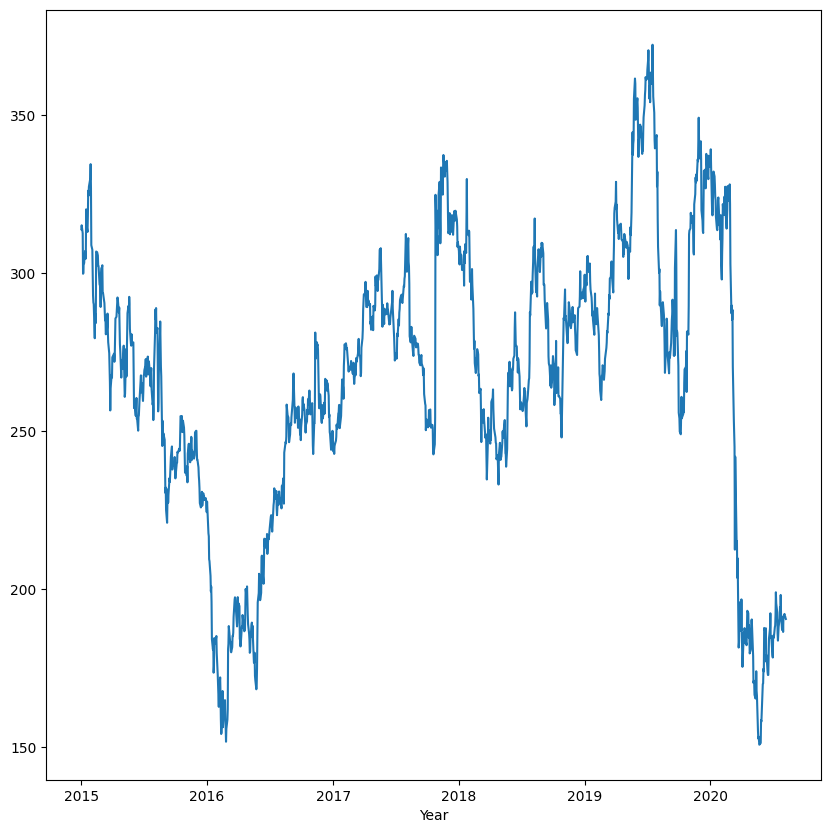

In [187]:
fig = plt.figure(figsize=(10,10))
plt.plot(df1)
plt.xlabel("Year")

In [188]:
df2 = df1['Price'].resample('MS').mean()

In [189]:
df2.head()

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
Freq: MS, Name: Price, dtype: float64

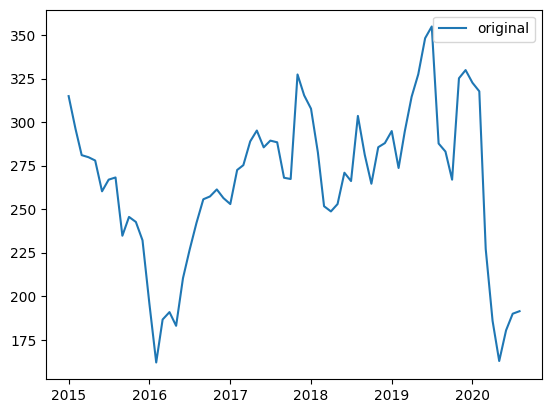

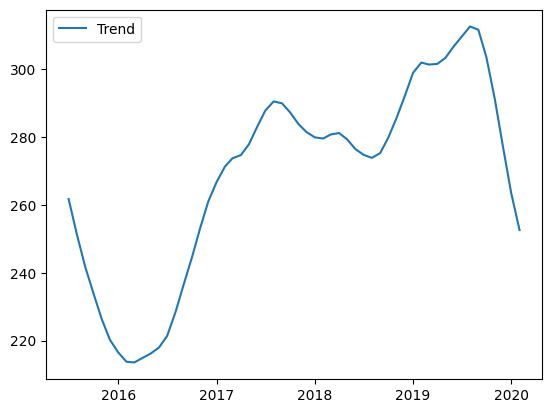

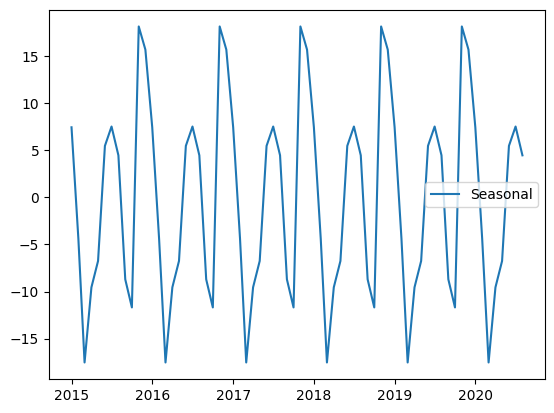

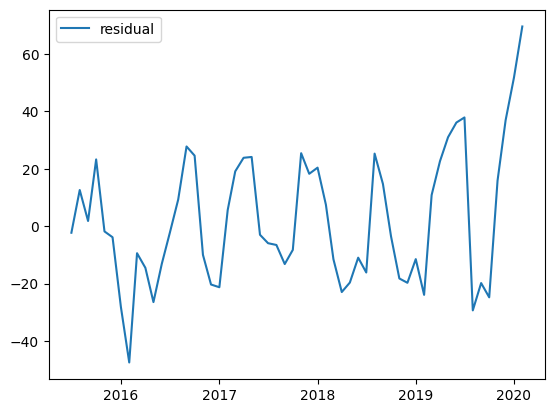

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2)

plt.plot(df2,label = 'original')
plt.legend(loc='best')

trend =decomposition.trend
plt.show()
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label = 'Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label = 'residual')
plt.legend(loc='best')

Checking whether data is stationary using Adfuller method

In [191]:
from statsmodels.tsa.stattools import adfuller

In [192]:
result = adfuller(df2)

print('ADF Statistics :%f' % result[0])
print('P - Value :%f' % result[1])
print('critical Values:')

for key,Value in result[4].items():
    print('\t%s: %.3f' % (key,Value))

ADF Statistics :-2.460279
P - Value :0.125440
critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


By passing ADF test,it is found that Time series data is not stationary so we are proceeding with KPSS method for checking again if the data is stationary.

In [193]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [194]:
kpss_test(df2)

Results of KPSS Test:
Test Statistic            0.141737
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


As the test statistic value is lesser than critical value we are accepting null hypthesis and concluding that data is not stationary.

Differencing the data to make the data stationary.

In [195]:
df2 = df2-df2.shift(1)

In [196]:
df2.isna().sum()

1

<AxesSubplot: xlabel='Date'>

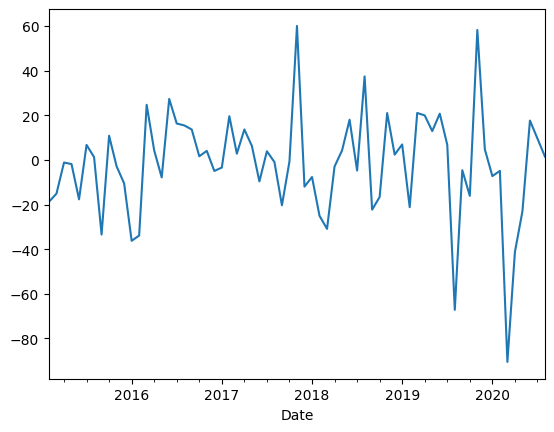

In [197]:
df2.dropna(inplace=True)
df2.plot()

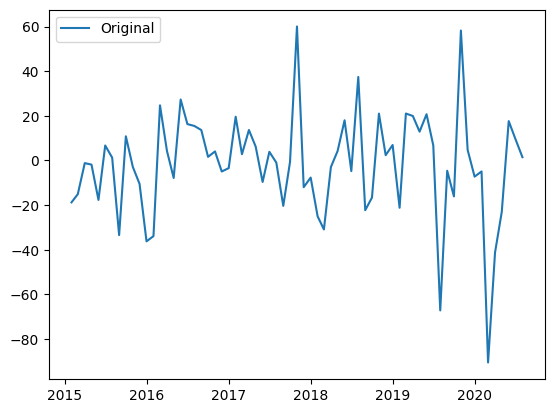

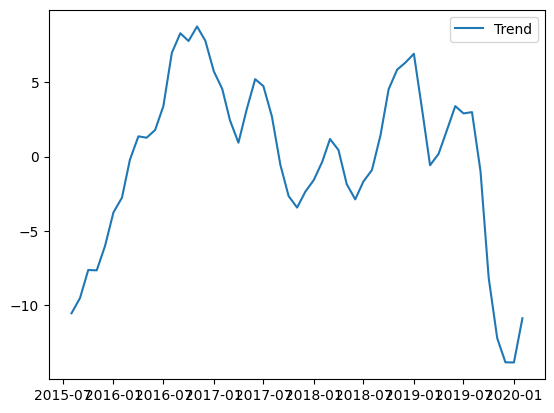

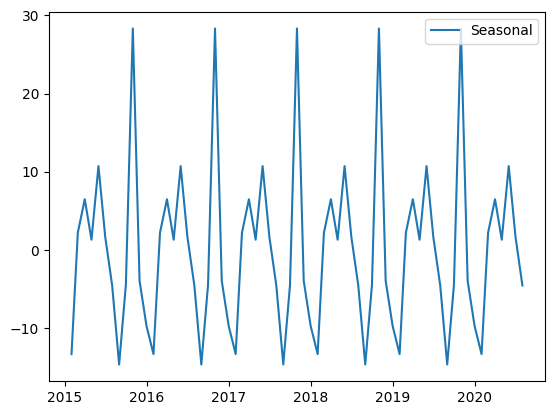

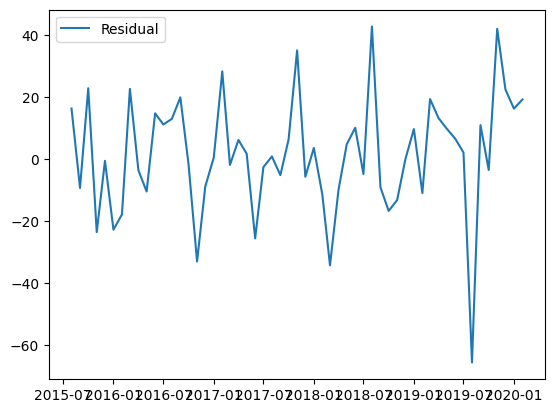

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2)

plt.plot(df2, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

Implementing ARIMA Model for Time Series 

In [199]:
import itertools

In [200]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Testing Data

In [201]:
size = int(len(df2) * 0.95)
train, test = df2[0:size], df2[size:len(df2)]

In [202]:
test.head()

Date
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

In [203]:
train.head()

Date
2015-02-01   -18.787381
2015-03-01   -15.112619
2015-04-01    -1.202381
2015-05-01    -1.877500
2015-06-01   -17.692955
Freq: MS, Name: Price, dtype: float64

In [204]:
import statsmodels.api as sm

In [205]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.0176020406125
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:468.41710772870243
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:496.6096221949672
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:366.5131642928738
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:477.6963736316133
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:468.0579930448644
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:369.7808848651431
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:358.721649138801
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:565.3557946844719
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:460.3260011309366
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.60818870778076
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:360.5729568954111
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:479.1909096970187
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:460.83011729547627
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:371.65469211624975
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.15931033181533
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:597.0631111621734
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:485.1780177261029
ARIMA(

In [206]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

In [208]:
min_val

31

In [209]:
order

(0, 1, 1)

In [211]:
seasonal_order

(1, 1, 1, 12)

Inserting ARIMA Module

In [216]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0815      0.221     -4.904      0.000      -1.514      -0.649
ar.S.L12      -0.8119      0.164     -4.950      0.000      -1.133      -0.490
ma.S.L12      -0.2666      0.370     -0.721      0.471      -0.992       0.458
sigma2       603.2456    245.865      2.454      0.014     121.358    1085.133


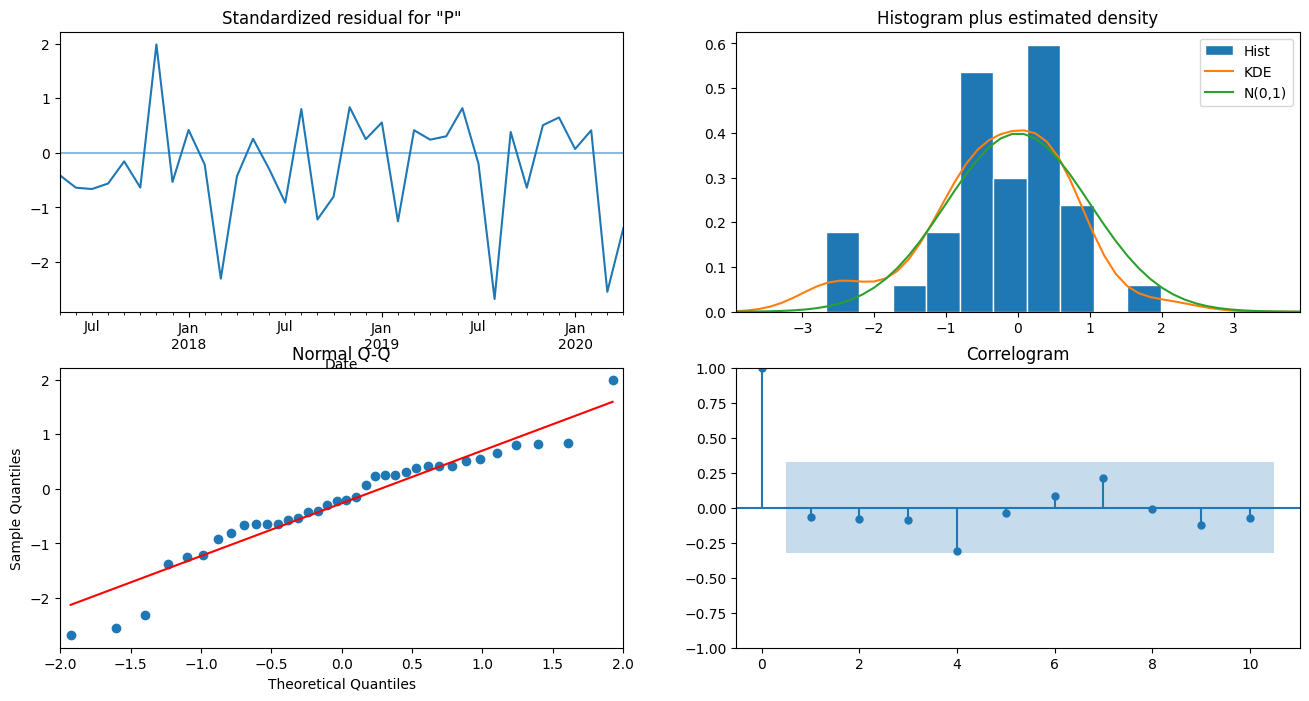

In [218]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Comparing predicted sales and real sales

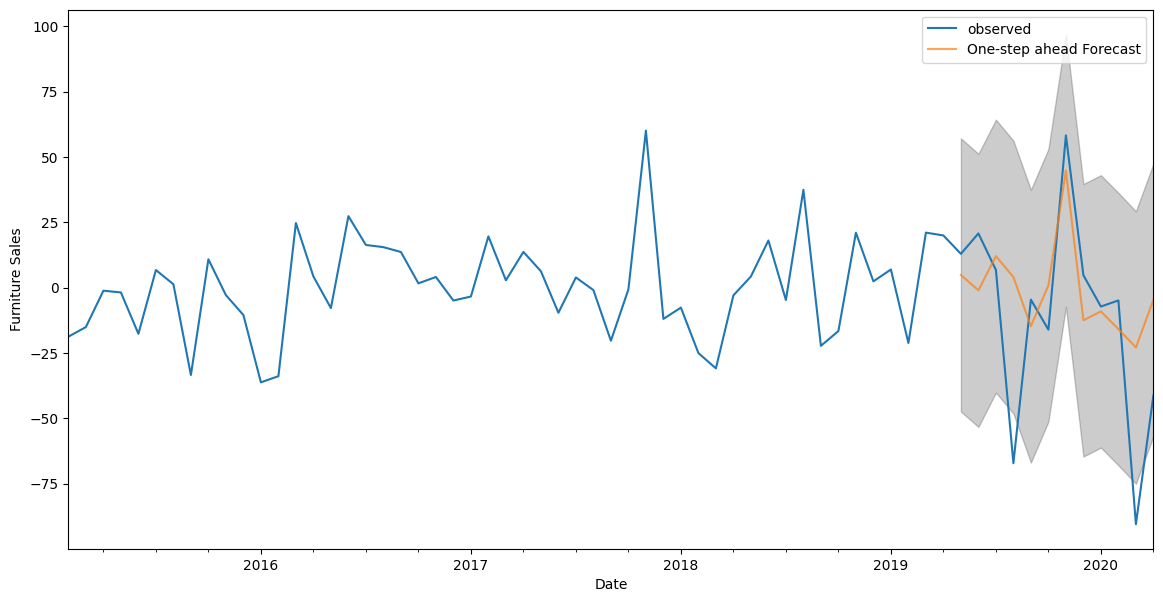

In [219]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Calculating RMSE and MSE

In [220]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1045.01
The Root Mean Squared Error of our forecasts is 32.33


Plot the values in chart form

            lower Price  upper Price
2020-05-01   -55.018036    49.311718
2020-06-01   -47.230453    57.221853
2020-07-01   -62.081000    42.698404
2020-08-01   -23.834264    81.263335
2020-09-01   -81.230499    24.184584
2020-10-01   -72.028538    33.703066
2020-11-01   -35.257106    70.790075
2020-12-01   -61.661116    44.700712
2021-01-01   -56.604211    50.071173
2021-02-01   -81.904065    25.088674
2021-03-01   -42.843266    64.461336
2021-04-01   -41.622786    65.992776
2021-05-01   -49.286013    58.320965


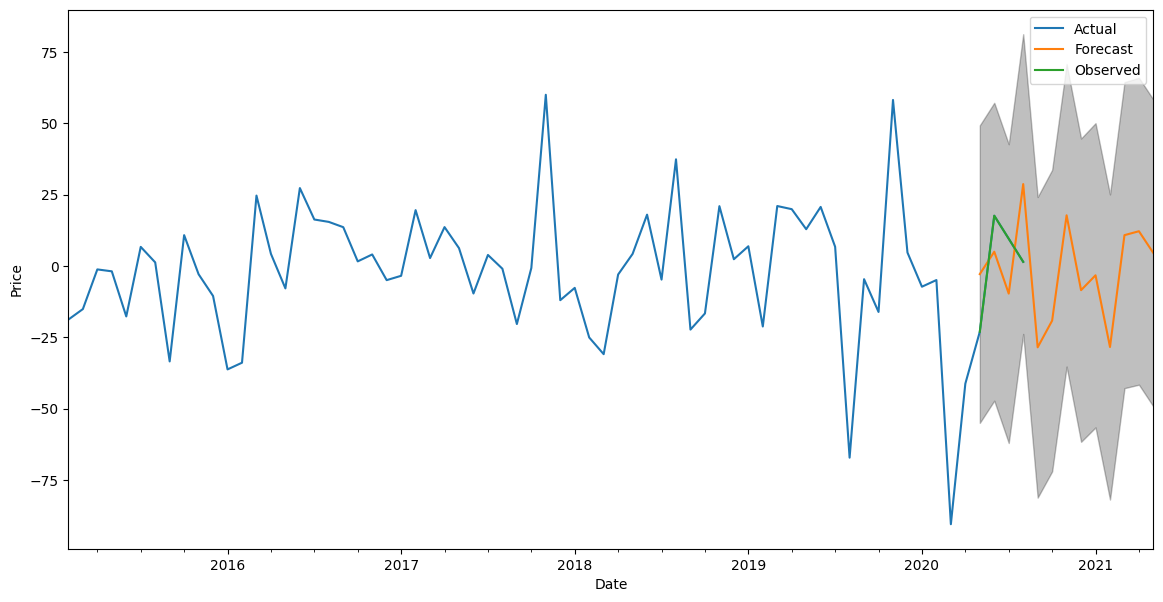

In [224]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = df2.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

Comparing Predictions


In [225]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Price']
Result

,Actual,Predicted
Date,,
2020-05-01,-23.078070,49.311718
2020-06-01,17.622010,57.221853
2020-07-01,9.550988,42.698404
2020-08-01,1.451739,81.263335


In [226]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3569.27
The Root Mean Squared Error of our forecasts is 59.74


Conclusion:
The stock price increases and decrease irrespective of the season. Stock price can analyised using a multivariate time series